<a href="https://colab.research.google.com/github/SeasonLeague/100_days_of_code/blob/main/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# IMPORT NECESSARY LIBRARIES
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [20]:
df = pd.read_csv("dataset1_info.csv")
df

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,284.161690,Blade,colGrain,25,4.460592,7.937116,22,0,7,Top,Investment
1,1599.551748,Blade,singleGrain,9,1.425973,2.432948,2,0,0,Bottom,Die
2,768.311031,Nozzle,colGrain,26,2.508879,3.841211,25,0,0,Bottom,Investment
3,1697.663828,Blade,colGrain,12,3.248913,2.610700,10,0,0,Bottom,Continuous
4,1491.478862,Nozzle,colGrain,20,1.901670,4.634926,24,0,0,Top,Die
...,...,...,...,...,...,...,...,...,...,...,...
995,462.984817,Blade,equiGrain,24,2.023624,2.741713,20,0,0,Bottom,Continuous
996,1426.298870,Nozzle,equiGrain,21,1.741670,7.206022,12,0,0,Bottom,Investment
997,1538.072772,Blade,colGrain,14,1.658848,8.276388,12,0,0,Top,Investment
998,1893.052813,Nozzle,equiGrain,9,2.124314,5.033330,0,0,0,Bottom,Continuous


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lifespan        1000 non-null   float64
 1   partType        1000 non-null   object 
 2   microstructure  1000 non-null   object 
 3   coolingRate     1000 non-null   int64  
 4   quenchTime      1000 non-null   float64
 5   forgeTime       1000 non-null   float64
 6   smallDefects    1000 non-null   int64  
 7   largeDefects    1000 non-null   int64  
 8   sliverDefects   1000 non-null   int64  
 9   seedLocation    1000 non-null   object 
 10  castType        1000 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


In [22]:
df.shape

(1000, 11)

In [23]:
df.describe()

,Lifespan,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,1366.373468,17.480000,2.786059,5.497136,13.37100,0.117000,0.286000
std,519.026551,7.557958,1.320935,2.613501,8.07047,0.565359,1.351307
min,115.120563,5.000000,0.501046,1.017799,0.00000,0.000000,0.000000
25%,960.976320,11.000000,1.608916,3.203739,8.00000,0.000000,0.000000
50%,1470.377014,17.000000,2.824488,5.510765,16.00000,0.000000,0.000000
75%,1757.165684,24.000000,3.902389,7.735951,20.00000,0.000000,0.000000
max,2380.142759,30.000000,4.990795,9.988511,33.00000,4.000000,10.000000


In [24]:
df.corr()

<ipython-input-24-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Lifespan,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects
Lifespan,1.000000,-0.790684,0.073613,0.028147,-0.654403,-0.020640,-0.054122
coolingRate,-0.790684,1.000000,0.025484,-0.008572,0.883986,0.014955,0.002521
quenchTime,0.073613,0.025484,1.000000,0.067526,0.023746,0.058248,0.040074
forgeTime,0.028147,-0.008572,0.067526,1.000000,-0.002457,0.063274,-0.006412
smallDefects,-0.654403,0.883986,0.023746,-0.002457,1.000000,0.005834,-0.017908
largeDefects,-0.020640,0.014955,0.058248,0.063274,0.005834,1.000000,-0.030741
sliverDefects,-0.054122,0.002521,0.040074,-0.006412,-0.017908,-0.030741,1.000000


<ipython-input-25-49c355d49270>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


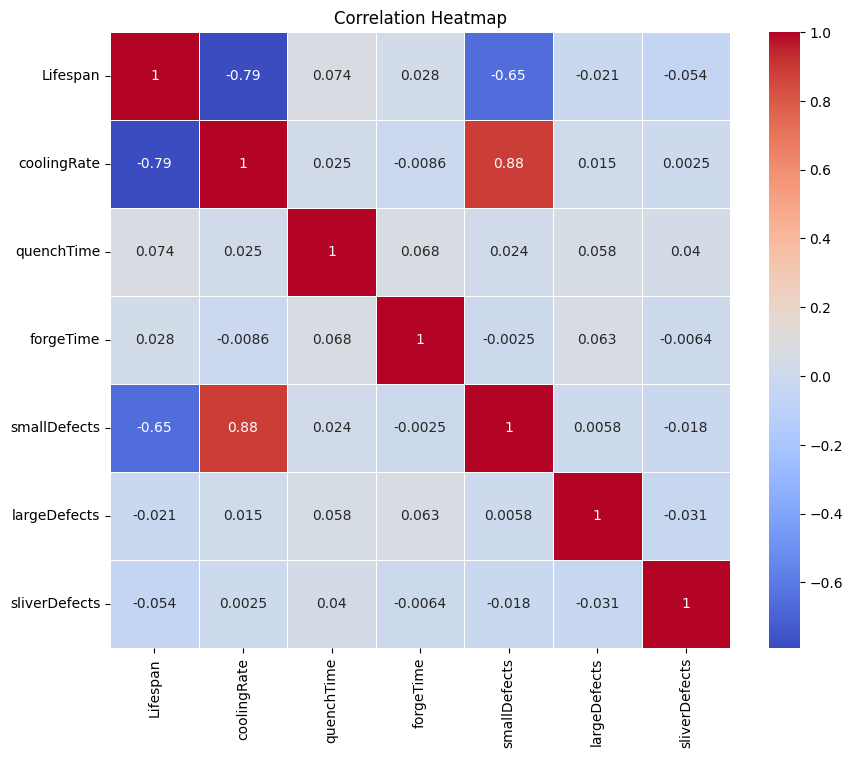

In [25]:
import seaborn as sns

# Create a correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


In [26]:
df_processed = pd.get_dummies(df, columns=['partType', 'microstructure', 'seedLocation', 'castType'], drop_first=True)

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_processed[['coolingRate', 'quenchTime', 'forgeTime']] = scaler.fit_transform(df[['coolingRate', 'quenchTime', 'forgeTime']])


In [28]:
from sklearn.model_selection import train_test_split

X = df_processed.drop('Lifespan', axis=1)
y = df_processed['Lifespan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Example for imputing missing values using scikit-learn SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)


In [30]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression
linear_model = LinearRegression()

# Decision Tree Regression
tree_model = DecisionTreeRegressor(random_state=42)

# Random Forest Regression
forest_model = RandomForestRegressor(random_state=42)

# Gradient Boosting Regression (XGBoost)
xgb_model = XGBRegressor(random_state=42)



In [31]:
# Define parameter grids for hyperparameter tuning
param_grid_linear = {}

param_grid_tree = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}


In [38]:
# Create GridSearchCV objects for hyperparameter tuning
grid_linear = GridSearchCV(linear_model, param_grid_linear, scoring='neg_mean_squared_error', cv=5)
grid_tree = GridSearchCV(tree_model, param_grid_tree, scoring='neg_mean_squared_error', cv=5)
grid_forest = GridSearchCV(forest_model, param_grid_forest, scoring='neg_mean_squared_error', cv=5)
grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, scoring='neg_mean_squared_error', cv=5)

# Fit models
grid_linear.fit(X_train, y_train)
grid_tree.fit(X_train, y_train)
grid_forest.fit(X_train, y_train)
grid_xgb.fit(X_train, y_train)

# Get best parameters
best_params_linear = grid_linear.best_params_
best_params_tree = grid_tree.best_params_
best_params_forest = grid_forest.best_params_
best_params_xgb = grid_xgb.best_params_



In [39]:
# Predictions on the test set
pred_linear = grid_linear.predict(X_test)
pred_tree = grid_tree.predict(X_test)
pred_forest = grid_forest.predict(X_test)
pred_xgb = grid_xgb.predict(X_test)

# Evaluate models
mae_linear = mean_absolute_error(y_test, pred_linear)
mae_tree = mean_absolute_error(y_test, pred_tree)
mae_forest = mean_absolute_error(y_test, pred_forest)
mae_xgb = mean_absolute_error(y_test, pred_xgb)

mse_linear = mean_squared_error(y_test, pred_linear)
mse_tree = mean_squared_error(y_test, pred_tree)
mse_forest = mean_squared_error(y_test, pred_forest)
mse_xgb = mean_squared_error(y_test, pred_xgb)

r2_linear = r2_score(y_test, pred_linear)
r2_tree = r2_score(y_test, pred_tree)
r2_forest = r2_score(y_test, pred_forest)
r2_xgb = r2_score(y_test, pred_xgb)


In [40]:
# Display best parameters and evaluation metrics
print("Linear Regression - Best Parameters:", best_params_linear)
print("MAE:", mae_linear)
print("MSE:", mse_linear)
print("R-squared:", r2_linear)
print("\n")

print("Decision Tree Regression - Best Parameters:", best_params_tree)
print("MAE:", mae_tree)
print("MSE:", mse_tree)
print("R-squared:", r2_tree)
print("\n")

print("Random Forest Regression - Best Parameters:", best_params_forest)
print("MAE:", mae_forest)
print("MSE:", mse_forest)
print("R-squared:", r2_forest)
print("\n")

print("XGBoost Regression - Best Parameters:", best_params_xgb)
print("MAE:", mae_xgb)
print("MSE:", mse_xgb)
print("R-squared:", r2_xgb)

Linear Regression - Best Parameters: {}
MAE: 188.00073311832645
MSE: 49179.53422115318
R-squared: 0.8286019504028523


Decision Tree Regression - Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
MAE: 73.73883896653412
MSE: 9532.438600344765
R-squared: 0.9667780224054886


Random Forest Regression - Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
MAE: 59.3678149183075
MSE: 5578.363887686008
R-squared: 0.9805585655611742


XGBoost Regression - Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
MAE: 36.9413505288252
MSE: 2186.777482743207
R-squared: 0.9923787526380449


# **BINARY CLASSIFICATION**

In [32]:
# Import necessary libraries for binary classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



In [33]:
# Alter the target variable for binary classification
df_binary = df.copy()
df_binary['Defective'] = (df_binary['Lifespan'] <= 1500).astype(int)
df_binary = df_binary.drop('Lifespan', axis=1)

In [34]:
# Identify categorical columns
categorical_cols = ['partType', 'microstructure', 'seedLocation', 'castType']

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['coolingRate', 'quenchTime', 'forgeTime']),
        ('cat', OneHotEncoder(), categorical_cols)
    ])



In [35]:
# Create pipeline with preprocessor and classifier
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', RandomForestClassifier(random_state=42))])


In [36]:
# Split the data into features (X) and target variable (y)
X_binary = df_binary.drop('Defective', axis=1)
y_binary = df_binary['Defective']

# Split the data into training and testing sets
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)



In [37]:
# Fit Random Forest model
rf_pipeline.fit(X_train_binary, y_train_binary)
y_pred_rf = rf_pipeline.predict(X_test_binary)

# Model 2: Support Vector Classifier (SVC)
svc_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', SVC(random_state=42))])



In [38]:
# Fit SVC model
svc_pipeline.fit(X_train_binary, y_train_binary)
y_pred_svc = svc_pipeline.predict(X_test_binary)



In [97]:
# Define the evaluate_model function
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print(f"\n{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")

In [98]:
# Evaluate Random Forest Classifier
evaluate_model(y_test_binary, y_pred_rf, "Random Forest Classifier")

# Evaluate Support Vector Classifier
evaluate_model(y_test_binary, y_pred_svc, "Support Vector Classifier")


Random Forest Classifier Metrics:
Accuracy: 0.9550
Precision: 0.9904
Recall: 0.9279
F1 Score: 0.9581
Confusion Matrix:
[[ 88   1]
 [  8 103]]

Support Vector Classifier Metrics:
Accuracy: 0.9050
Precision: 0.9340
Recall: 0.8919
F1 Score: 0.9124
Confusion Matrix:
[[82  7]
 [12 99]]


# **PART 5: Artificial Neural Network**

In [99]:
# Import necessary libraries for CNN
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [100]:
# Load the metadata
df_metadata = pd.read_csv("dataset2_images.csv")  # Update with the correct path

df_metadata

,Image Filename,Defect,Type
0,scan_0.png,Yes,Splinter
1,scan_1.png,No,None
2,scan_2.png,Yes,Multiple
3,scan_3.png,No,None
4,scan_4.png,No,None
...,...,...,...
995,scan_995.png,Yes,Large
996,scan_996.png,No,None
997,scan_997.png,No,None
998,scan_998.png,No,None


In [101]:
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Image Filename  1000 non-null   object
 1   Defect          1000 non-null   object
 2   Type            1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [102]:
df_metadata.shape

(1000, 3)

In [103]:
# Data preprocessing
le = LabelEncoder()
df_metadata['Defect'] = le.fit_transform(df_metadata['Defect'])
df_metadata['Type'] = le.fit_transform(df_metadata['Type'])

# Split the data into training and testing sets
train_df, test_df = train_test_split(df_metadata, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=2))  # Two input dimensions: Defect and Type
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Two outputs: Defect and Type


In [104]:
from tensorflow.keras.utils import to_categorical  # Import to_categorical
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(train_df[['Defect', 'Type']], to_categorical(train_df['Defect']),
                    epochs=20, validation_split=0.2, callbacks=[early_stopping])



Epoch 1/20
20/20 [==============================] - 2s 25ms/step - loss: 0.6221 - accuracy: 0.6828 - val_loss: 0.5448 - val_accuracy: 0.9000
Epoch 2/20
20/20 [==============================] - 0s 7ms/step - loss: 0.4109 - accuracy: 0.8953 - val_loss: 0.2740 - val_accuracy: 0.9000
Epoch 3/20
20/20 [==============================] - 0s 7ms/step - loss: 0.1923 - accuracy: 0.9594 - val_loss: 0.0770 - val_accuracy: 1.0000
Epoch 4/20
20/20 [==============================] - 0s 8ms/step - loss: 0.1109 - accuracy: 0.9750 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 5/20
20/20 [==============================] - 0s 7ms/step - loss: 0.0536 - accuracy: 0.9891 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 6/20
20/20 [==============================] - 0s 7ms/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 7/20
20/20 [==============================] - 0s 7ms/step - loss: 0.0218 - accuracy: 0.9922 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 8/20
20/20 [=

In [105]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_df[['Defect', 'Type']], to_categorical(test_df['Defect']))
print(f"\nTest Accuracy: {test_acc:.4f}")

# Predictions on test set
y_pred = model.predict(test_df[['Defect', 'Type']])




7/7 [==============================] - 0s 3ms/step - loss: 2.2794e-05 - accuracy: 1.0000

Test Accuracy: 1.0000
7/7 [==============================] - 0s 2ms/step


In [106]:
# Decode predictions
def decode_predictions(predictions):
    return [np.argmax(pred) for pred in predictions]

y_pred_defect = decode_predictions(y_pred)



In [107]:
# Evaluate predictions
def evaluate_binary(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print("\nBinary Classification Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")



In [108]:
# Evaluate the binary predictions
evaluate_binary(test_df['Defect'], y_pred_defect)


Binary Classification Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[123   0]
 [  0  77]]


# ✈ **K-Means Clustering Part 6**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [39]:
# Load the initial tabular dataset (Dataset 1)
df_initial = pd.read_csv("dataset1_info.csv")  # Update with the correct path

# Select relevant continuous variables for clustering
features_for_clustering = ['Lifespan', 'coolingRate', 'quenchTime', 'forgeTime']
X = df_initial[features_for_clustering]


In [40]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [41]:
# Apply K-means clustering with different values of k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

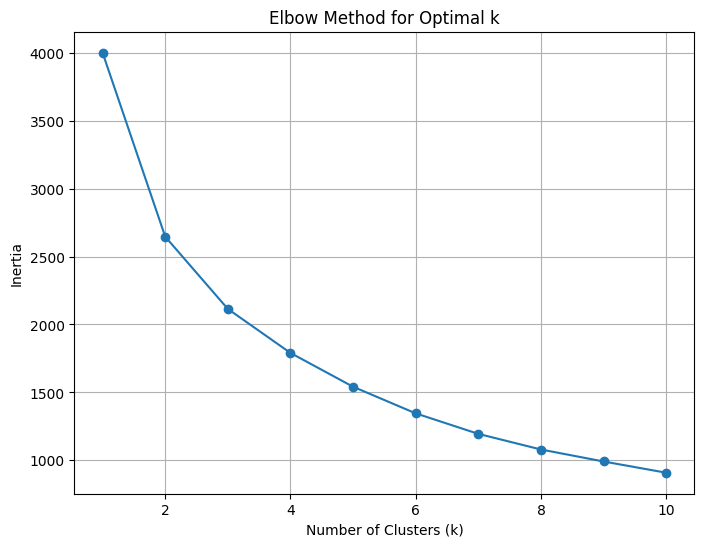

In [42]:
# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [43]:
# Choose the optimal value for k based on the Elbow Method (update as needed)
optimal_k = 2



In [44]:
# Apply K-means clustering with the chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_initial['Cluster'] = kmeans.fit_predict(X_scaled)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [45]:
# Visualize the results with a scatter plot (using PCA for dimensionality reduction)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



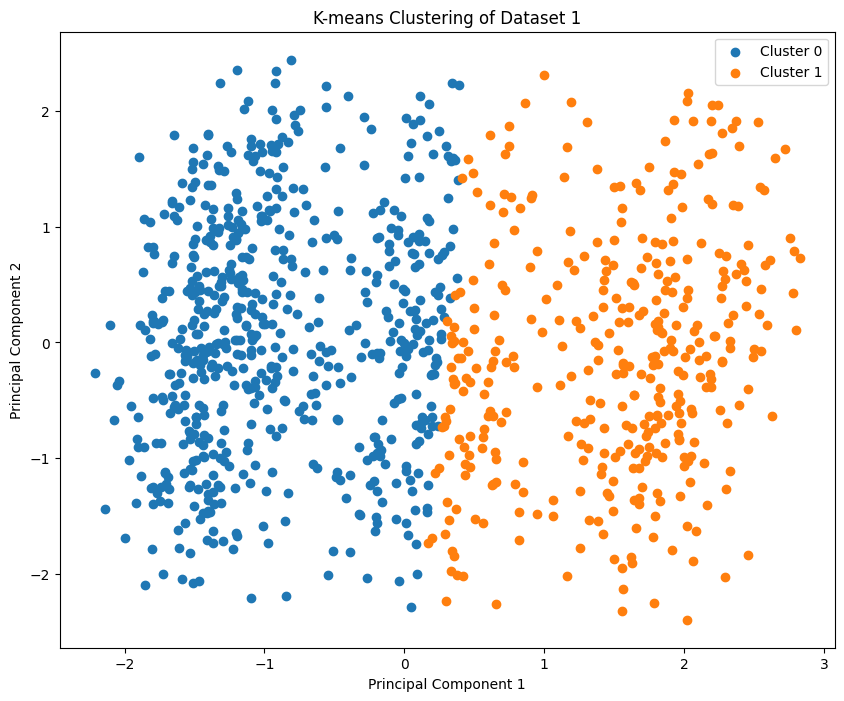

In [46]:
plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):
    plt.scatter(X_pca[df_initial['Cluster'] == cluster, 0], X_pca[df_initial['Cluster'] == cluster, 1], label=f'Cluster {cluster}')

plt.title('K-means Clustering of Dataset 1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## COMPARE AND CONTRAST

In [51]:
# Assuming you have already performed the K-means clustering and added 'Cluster' column to df_initial
df_initial
# Comparison with Binary Classification (Part 4):
binary_classification = df_initial['smallDefects'].tolist()
cluster_assignment = df_initial['Cluster'].tolist()


In [52]:

# Check correspondence between clusters and binary classification
correspondence = [(binary, cluster) for binary, cluster in zip(binary_classification, cluster_assignment)]

# Count the number of instances where the binary classification matches the cluster
match_count = sum(1 for binary, cluster in correspondence if binary == cluster)




In [53]:
# Calculate the percentage of matching instances
match_percentage = (match_count / len(binary_classification)) * 100

print(f"Percentage of Matching Instances: {match_percentage:.2f}%")



Percentage of Matching Instances: 9.70%


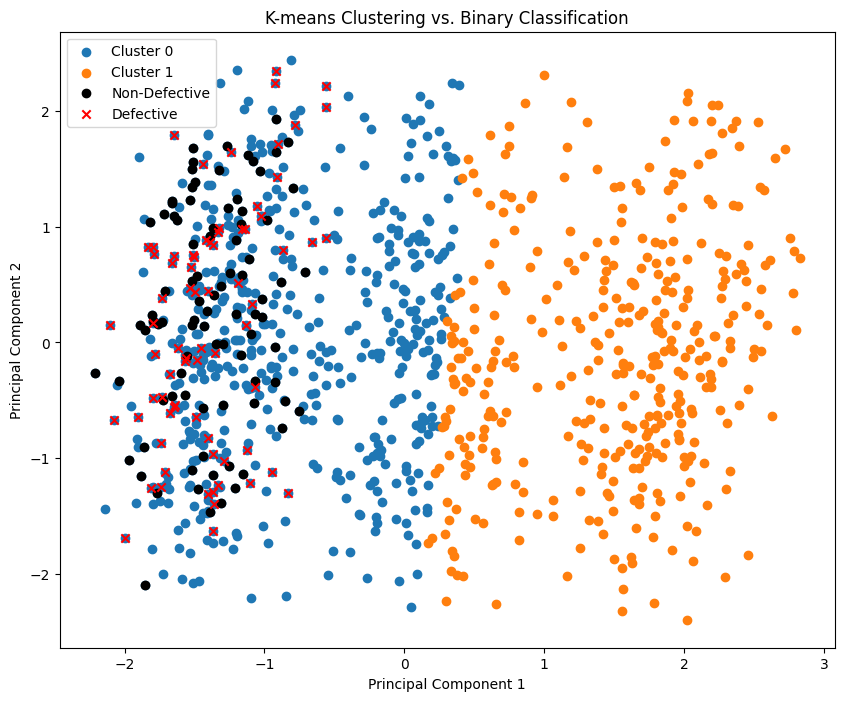

In [73]:
# Visualize the scatter plot
plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):
    plt.scatter(X_pca[df_initial['Cluster'] == cluster, 0], X_pca[df_initial['Cluster'] == cluster, 1], label=f'Cluster {cluster}')

df_initial["TotalDefects"] = df_initial[['largeDefects', 'smallDefects', 'sliverDefects']].sum(axis=1)

df_initial


# Use different markers for non-defective and defective points
non_defective_indices = df_initial[df_initial['TotalDefects'] == 0].index
defective_indices = df_initial[df_initial['TotalDefects'] == 1].index

plt.scatter(X_pca[non_defective_indices, 0], X_pca[non_defective_indices, 1], marker='o', color='black', label='Non-Defective')
plt.scatter(X_pca[defective_indices, 0], X_pca[defective_indices, 1], marker='x', color='red', label='Defective')

plt.title('K-means Clustering vs. Binary Classification')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


# **VISUALIZATION** AND PLOTTING

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [67]:
df = pd.read_csv("dataset1_info.csv")
df

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,284.161690,Blade,colGrain,25,4.460592,7.937116,22,0,7,Top,Investment
1,1599.551748,Blade,singleGrain,9,1.425973,2.432948,2,0,0,Bottom,Die
2,768.311031,Nozzle,colGrain,26,2.508879,3.841211,25,0,0,Bottom,Investment
3,1697.663828,Blade,colGrain,12,3.248913,2.610700,10,0,0,Bottom,Continuous
4,1491.478862,Nozzle,colGrain,20,1.901670,4.634926,24,0,0,Top,Die
...,...,...,...,...,...,...,...,...,...,...,...
995,462.984817,Blade,equiGrain,24,2.023624,2.741713,20,0,0,Bottom,Continuous
996,1426.298870,Nozzle,equiGrain,21,1.741670,7.206022,12,0,0,Bottom,Investment
997,1538.072772,Blade,colGrain,14,1.658848,8.276388,12,0,0,Top,Investment
998,1893.052813,Nozzle,equiGrain,9,2.124314,5.033330,0,0,0,Bottom,Continuous


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lifespan        1000 non-null   float64
 1   partType        1000 non-null   object 
 2   microstructure  1000 non-null   object 
 3   coolingRate     1000 non-null   int64  
 4   quenchTime      1000 non-null   float64
 5   forgeTime       1000 non-null   float64
 6   smallDefects    1000 non-null   int64  
 7   largeDefects    1000 non-null   int64  
 8   sliverDefects   1000 non-null   int64  
 9   seedLocation    1000 non-null   object 
 10  castType        1000 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


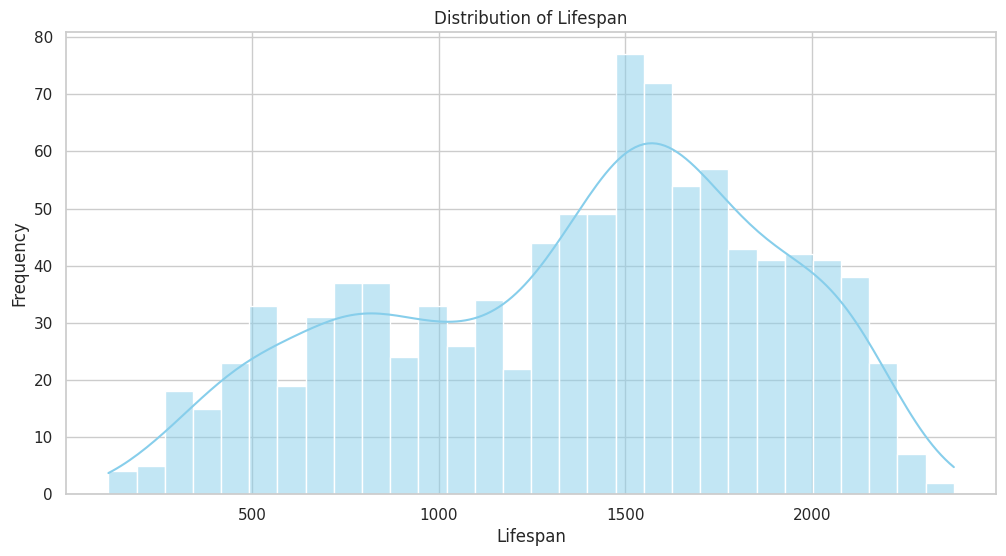

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Plotting distribution of Lifespan
plt.figure(figsize=(12, 6))
sns.histplot(df['Lifespan'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Lifespan')
plt.xlabel('Lifespan')
plt.ylabel('Frequency')
plt.show()


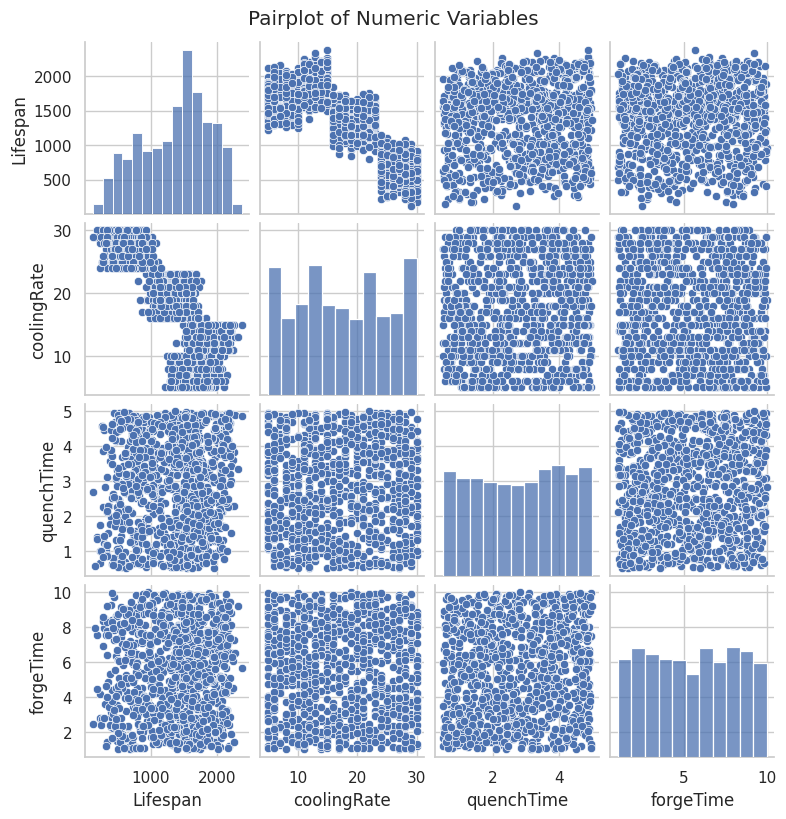

In [85]:
# Pairplot for numeric variables
sns.pairplot(df[['Lifespan', 'coolingRate', 'quenchTime', 'forgeTime']], height=2)
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()


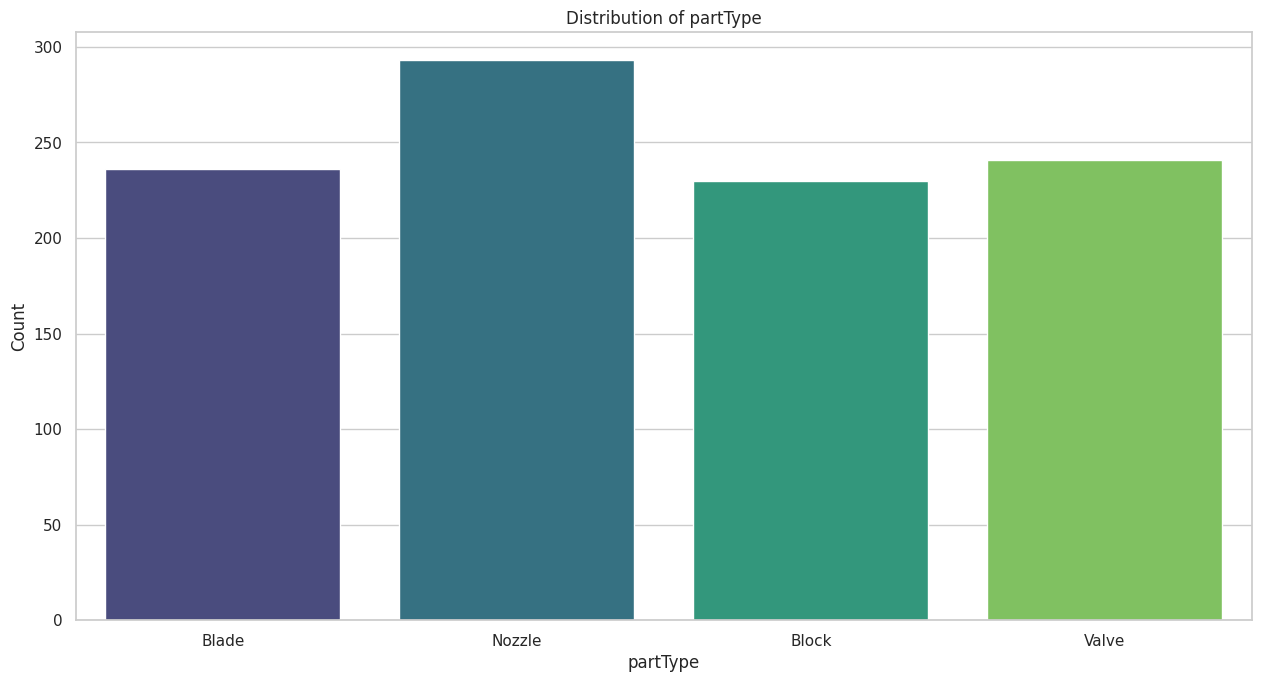

In [86]:
# Bar plot for partType
plt.figure(figsize=(12, 6))
sns.countplot(x='partType', data=df, palette='viridis')
plt.title('Distribution of partType')
plt.xlabel('partType')
plt.ylabel('Count')
plt.show()




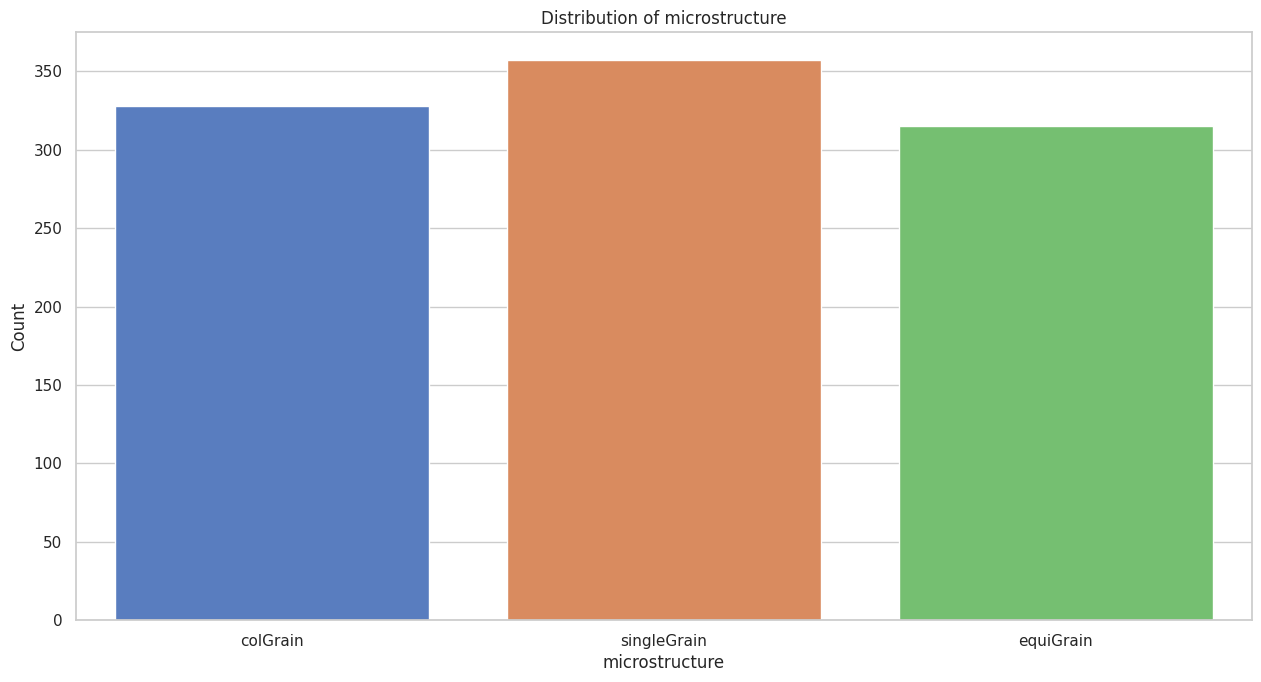

In [87]:
# Bar plot for microstructure
plt.figure(figsize=(12, 6))
sns.countplot(x='microstructure', data=df, palette='muted')
plt.title('Distribution of microstructure')
plt.xlabel('microstructure')
plt.ylabel('Count')
plt.show()

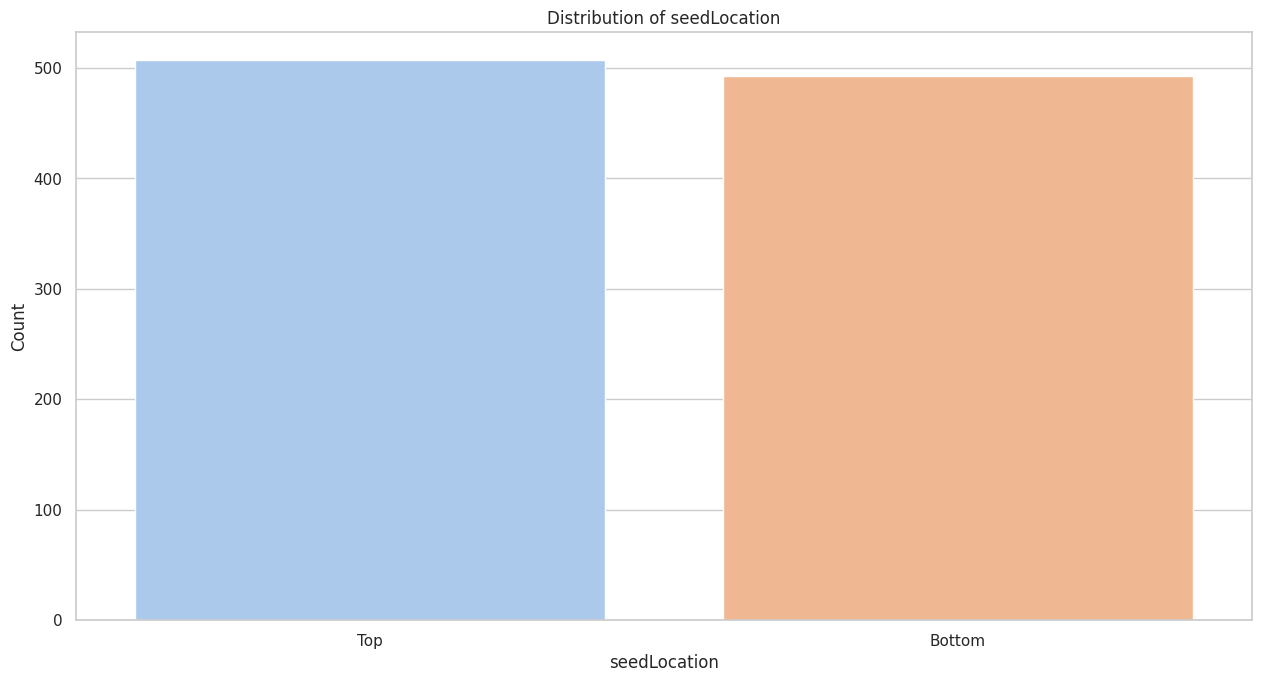

In [88]:
# Bar plot for seedLocation
plt.figure(figsize=(12, 6))
sns.countplot(x='seedLocation', data=df, palette='pastel')
plt.title('Distribution of seedLocation')
plt.xlabel('seedLocation')
plt.ylabel('Count')
plt.show()



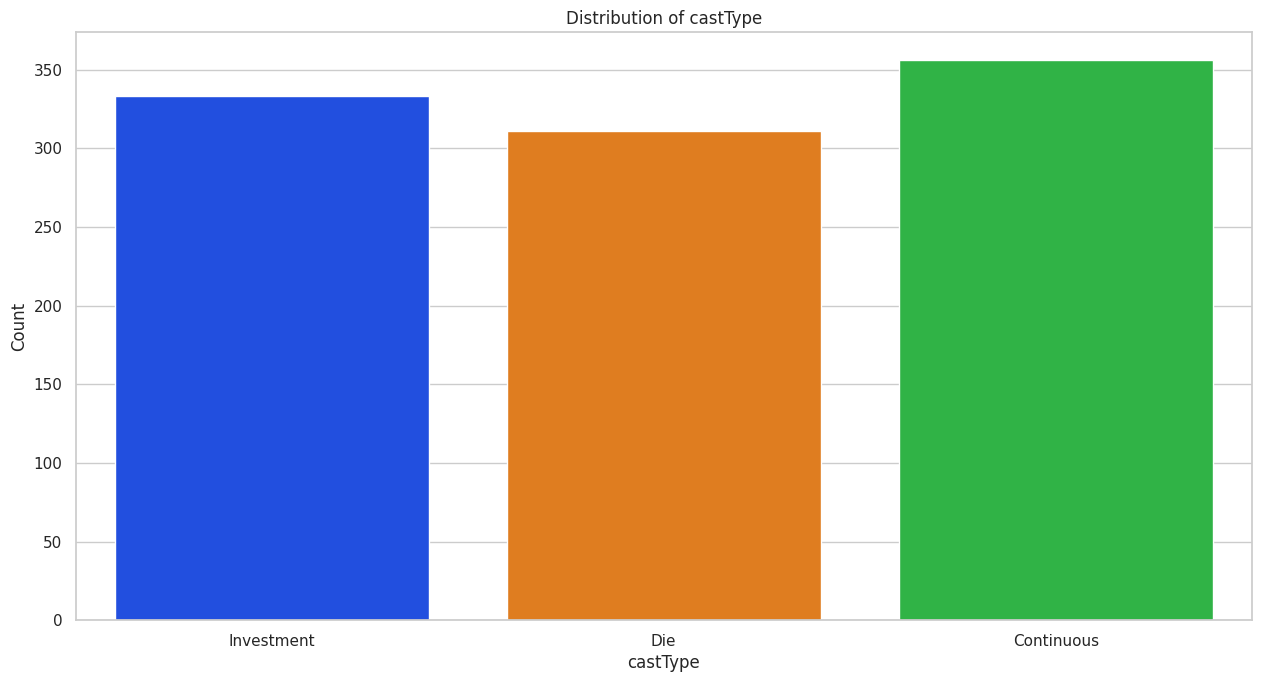

In [89]:
# Bar plot for castType
plt.figure(figsize=(12, 6))
sns.countplot(x='castType', data=df, palette='bright')
plt.title('Distribution of castType')
plt.xlabel('castType')
plt.ylabel('Count')
plt.show()
